# ACML Project

## Predicting Life Expectancy considering immunization and human development index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import seaborn as sns 

sns.set_style("darkgrid")

C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data Description 


The data was downloaded from (https://www.kaggle.com/kumarajarshi/life-expectancy-who) on 13 April 2021. This is data from the World Health Organisation taken between 2000 and 2015. It describes the life expectancy along with the immunization factors, mortality factors, economic factors, social factors and other health related factors for 193 countries.

## Variable Description


#### Country
Name of the country

#### Life expectancy
Life Expectancy in age 

#### Adult Mortality
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

#### Status
Developed or Developing status

#### Infant deaths
Number of Infant Deaths per 1000 population

#### Alcohol
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

#### percentage expenditure
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

#### Hepatitis B
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

#### Measles
Measles - number of reported cases per 1000 population

#### Year
Year when life expectancy was taken

#### BMI
Average Body Mass Index of entire population

#### under-five deaths
Number of under-five deaths per 1000 population

#### Polio
Polio (Pol3) immunization coverage among 1-year-olds (%)

#### Total expenditure
General government expenditure on health as a percentage of total government expenditure (%)

#### Diphtheria
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

#### HIV/AIDS
Deaths per 1 000 live births HIV/AIDS (0-4 years)

#### GDP
Gross Domestic Product per capita (in USD)

#### Population
Population of the country

#### thinness 1-19 years
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

#### thinness 5-9 years
Prevalence of thinness among children for Age 5 to 9(%)

#### Income composition of resources
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

#### Schooling
Number of years of Schooling(years)



## Load Data

In [2]:
dataset = pd.read_csv('Life Expectancy Data.csv', sep=",")

In [3]:
dataset.head(30)

Country  Year      Status  Life expectancy   Adult Mortality  \
0   Afghanistan  2015  Developing              65.0            263.0   
1   Afghanistan  2014  Developing              59.9            271.0   
2   Afghanistan  2013  Developing              59.9            268.0   
3   Afghanistan  2012  Developing              59.5            272.0   
4   Afghanistan  2011  Developing              59.2            275.0   
5   Afghanistan  2010  Developing              58.8            279.0   
6   Afghanistan  2009  Developing              58.6            281.0   
7   Afghanistan  2008  Developing              58.1            287.0   
8   Afghanistan  2007  Developing              57.5            295.0   
9   Afghanistan  2006  Developing              57.3            295.0   
10  Afghanistan  2005  Developing              57.3            291.0   
11  Afghanistan  2004  Developing              57.0            293.0   
12  Afghanistan  2003  Developing              56.7            295.0   
13  Afghanistan  2002  Developing              56.2              3.0   
14  Afghanistan  2001  Developing              55.3            316.0   
15  Afghanistan  2000  Developing              54.8            321.0   
16      Albania  2015  Developing              77.8             74.0   
17      Albania  2014  Developing              77.5              8.0   
18      Albania  2013  Developing              77.2             84.0   
19      Albania  2012  Developing              76.9             86.0   
20      Albania  2011  Developing              76.6             88.0   
21      Albania  2010  Developing              76.2             91.0   
22      Albania  2009  Developing              76.1             91.0   
23      Albania  2008  Developing              75.3              1.0   
24      Albania  2007  Developing              75.9              9.0   
25      Albania  2006  Developing              74.2             99.0   
26      Albania  2005  Developing              73.5             15.0   
27      Albania  2004  Developing              73.0             17.0   
28      Albania  2003  Developing              72.8             18.0   
29      Albania  2002  Developing              73.3             15.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0              62     0.01               71.279624         65.0      1154   
1              64     0.01               73.523582         62.0       492   
2              66     0.01               73.219243         64.0       430   
3              69     0.01               78.184215         67.0      2787   
4              71     0.01                7.097109         68.0      3013   
5              74     0.01               79.679367         66.0      1989   
6              77     0.01               56.762217         63.0      2861   
7              80     0.03               25.873925         64.0      1599   
8              82     0.02               10.910156         63.0      1141   
9              84     0.03               17.171518         64.0      1990   
10             85     0.02                1.388648         66.0      1296   
11             87     0.02               15.296066         67.0       466   
12             87     0.01               11.089053         65.0       798   
13             88     0.01               16.887351         64.0      2486   
14             88     0.01               10.574728         63.0      8762   
15             88     0.01               10.424960         62.0      6532   
16              0     4.60              364.975229         99.0         0   
17              0     4.51              428.749067         98.0         0   
18              0     4.76              430.876979         99.0         0   
19              0     5.14              412.443356         99.0         9   
20              0     5.37              437.062100         99.0        28   
21              1     5.28               41.822757         99.0        10   
22  

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

## Data Cleaning

###### Inspect the differences between developing and developed countries

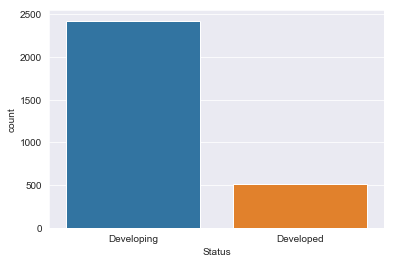

In [5]:
sns.countplot(x='Status',data=dataset)

In [6]:
developing = dataset[dataset.Status == 'Developing']
developing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2426 non-null object
Year                               2426 non-null int64
Status                             2426 non-null object
Life expectancy                    2416 non-null float64
Adult Mortality                    2416 non-null float64
infant deaths                      2426 non-null int64
Alcohol                            2260 non-null float64
percentage expenditure             2426 non-null float64
Hepatitis B                        2046 non-null float64
Measles                            2426 non-null int64
 BMI                               2392 non-null float64
under-five deaths                  2426 non-null int64
Polio                              2407 non-null float64
Total expenditure                  2232 non-null float64
Diphtheria                         2407 non-null float64
 HIV/AIDS                          2426 non-null

In [7]:
developed = dataset[dataset.Status == 'Developed']
developed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 112 to 2809
Data columns (total 22 columns):
Country                            512 non-null object
Year                               512 non-null int64
Status                             512 non-null object
Life expectancy                    512 non-null float64
Adult Mortality                    512 non-null float64
infant deaths                      512 non-null int64
Alcohol                            484 non-null float64
percentage expenditure             512 non-null float64
Hepatitis B                        339 non-null float64
Measles                            512 non-null int64
 BMI                               512 non-null float64
under-five deaths                  512 non-null int64
Polio                              512 non-null float64
Total expenditure                  480 non-null float64
Diphtheria                         512 non-null float64
 HIV/AIDS                          512 non-null float64
GDP   

###### identify null values

In [8]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

###### Replace developing country alcohol consumption null values with the mean alcohol consumption for developing countries

In [9]:
#replace null alcohol with most occuring 

mask2 = (dataset['Status'] == 'Developing') 
avg_filler = dataset.loc[mask2, 'Alcohol'].mean()
avg_filler
dataset.loc[dataset['Status'] == 'Developing', 'Alcohol'] = dataset.loc[dataset['Status'] == 'Developing'].fillna(avg_filler)
#dataset.isnull().sum()

###### Replace developed country alcohol consumption null values with the mean alcohol consumption for developed countries

In [10]:
mask2 = (dataset['Status'] == 'Developed') 
avg_filler = dataset.loc[mask2, 'Alcohol'].mean()
avg_filler
dataset.loc[dataset['Status'] == 'Developed', 'Alcohol'] = dataset.loc[dataset['Status'] == 'Developed'].fillna(avg_filler)
#dataset.isnull().sum()

###### Replace developed countries' GDP null values with the median GDP of developed countries

In [11]:
mask3 = (dataset['Status'] == 'Developed') 
median_filler = dataset.loc[mask3, 'GDP'].median()
median_filler
dataset.loc[dataset['Status'] == 'Developed', 'GDP'] = dataset.loc[dataset['Status'] == 'Developed'].fillna(median_filler)
#dataset.isnull().sum()

###### Replace developing countries' GDP null values with the median GDP of developing countries

In [12]:
mask4 = (dataset['Status'] == 'Developing') 
median_filler = dataset.loc[mask4, 'GDP'].median()
median_filler
dataset.loc[dataset['Status'] == 'Developing', 'GDP'] = dataset.loc[dataset['Status'] == 'Developing'].fillna(median_filler)
#dataset.isnull().sum()

###### Replace null population values from developing countries with the mean developing country population

In [13]:
mask5 = (dataset['Status'] == 'Developing') 
avg_filler = dataset.loc[mask5, 'Population'].mean()
avg_filler
dataset.loc[dataset['Status'] == 'Developing', 'Population'] = dataset.loc[dataset['Status'] == 'Developing'].fillna(avg_filler)
#dataset.isnull().sum()

In [14]:
mask6 = (dataset['Status'] == 'Developed') 
avg_filler = dataset.loc[mask6, 'Population'].mean()
avg_filler
dataset.loc[dataset['Status'] == 'Developed', 'Population'] = dataset.loc[dataset['Status'] == 'Developed'].fillna(avg_filler)
#dataset.isnull().sum()

###### The rest drop the null values

In [15]:
dataset.dropna(inplace=True)
#dataset.isnull().sum()

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2083 non-null object
Year                               2083 non-null int64
Status                             2083 non-null object
Life expectancy                    2083 non-null float64
Adult Mortality                    2083 non-null float64
infant deaths                      2083 non-null int64
Alcohol                            2083 non-null float64
percentage expenditure             2083 non-null float64
Hepatitis B                        2083 non-null float64
Measles                            2083 non-null int64
 BMI                               2083 non-null float64
under-five deaths                  2083 non-null int64
Polio                              2083 non-null float64
Total expenditure                  2083 non-null float64
Diphtheria                         2083 non-null float64
 HIV/AIDS                          2083 non-null

###### Correlation values

In [17]:
dataset.corr()

Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.052451        -0.031049   
Life expectancy                  0.052451          1.000000        -0.703598   
Adult Mortality                 -0.031049         -0.703598         1.000000   
infant deaths                    0.009421         -0.178755         0.058599   
Alcohol                         -0.089871          0.353004        -0.127564   
percentage expenditure           0.074411          0.402999        -0.236769   
Hepatitis B                      0.116534          0.227620        -0.141537   
Measles                         -0.047773         -0.080071         0.010858   
 BMI                             0.006612          0.510816        -0.347258   
under-five deaths                0.011595         -0.201021         0.075779   
Polio                           -0.017721          0.348396        -0.221107   
Total expenditure                0.085266          0.129467        -0.039456   
Diphtheria                       0.041475          0.343990        -0.203626   
 HIV/AIDS                       -0.101926         -0.581693         0.541558   
GDP                              0.091931          0.428412        -0.267500   
Population                       0.011064         -0.024290        -0.011858   
 thinness  1-19 years            0.025714         -0.436592         0.258664   
 thinness 5-9 years              0.021641         -0.437703         0.273086   
Income composition of resources  0.129520          0.692107        -0.449290   
Schooling                        0.106314          0.703518        -0.423245   

                                 infant deaths   Alcohol  \
Year                                  0.009421 -0.089871   
Life expectancy                      -0.178755  0.353004   
Adult Mortality                       0.058599 -0.127564   
infant deaths                         1.000000 -0.094108   
Alcohol                              -0.094108  1.000000   
percentage expenditure               -0.086580  0.345365   
Hepatitis B                          -0.226001  0.065291   
Measles                               0.535559 -0.042807   
 BMI                                 -0.223124  0.278162   
under-five deaths                     0.996923 -0.088602   
Polio                                -0.159920  0.185853   
Total expenditure                    -0.116360  0.262447   
Diphtheria                           -0.159706  0.180509   
 HIV/AIDS                             0.019789 -0.013742   
GDP                                  -0.099161  0.297033   
Population                            0.668548 -0.026829   
 thinness  1-19 years                 0.439603 -0.401024   
 thinness 5-9 years                   0.439286 -0.382150   
Income composition of resources      -0.134275  0.430515   
Schooling                            -0.204463  0.532900   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.074411     0.116534   
Life expectancy                                0.402999     0.227620   
Adult Mortality                               -0.236769    -0.141537   
infant deaths                                 -0.086580    -0.226001   
Alcohol                                        0.345365     0.065291   
percentage expenditure                         1.000000     0.018802   
Hepatitis B                                    0.018802     1.000000   
Measles                                       -0.059137    -0.127131   
 BMI                                           0.221952     0.145515   
under-five deaths                             -0.087507    -0.234699   
Polio                                          0.126944     0.479156   
Total expenditure                              0.128811     0.066310   
Diphtheria                                     0.120427     0.585540   
 HIV/AIDS                                     -0.087346    -0.105064   
GDP            

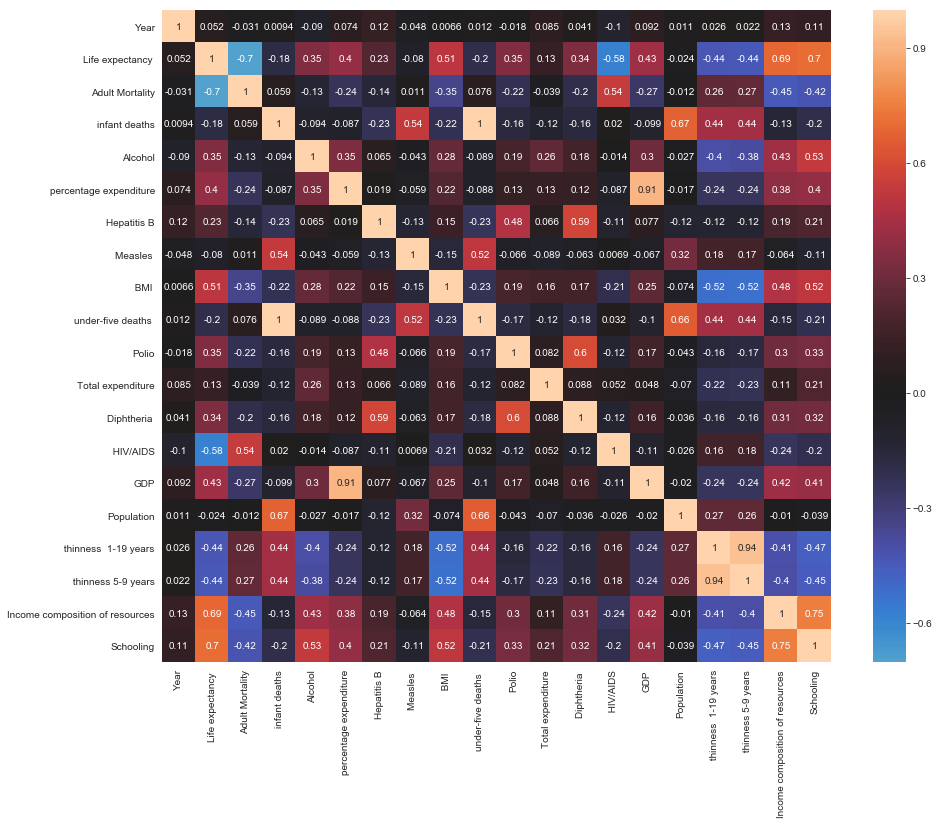

In [18]:
plt.figure(figsize=(15, 12))
sns.heatmap(dataset.corr(),center=0,annot=True)

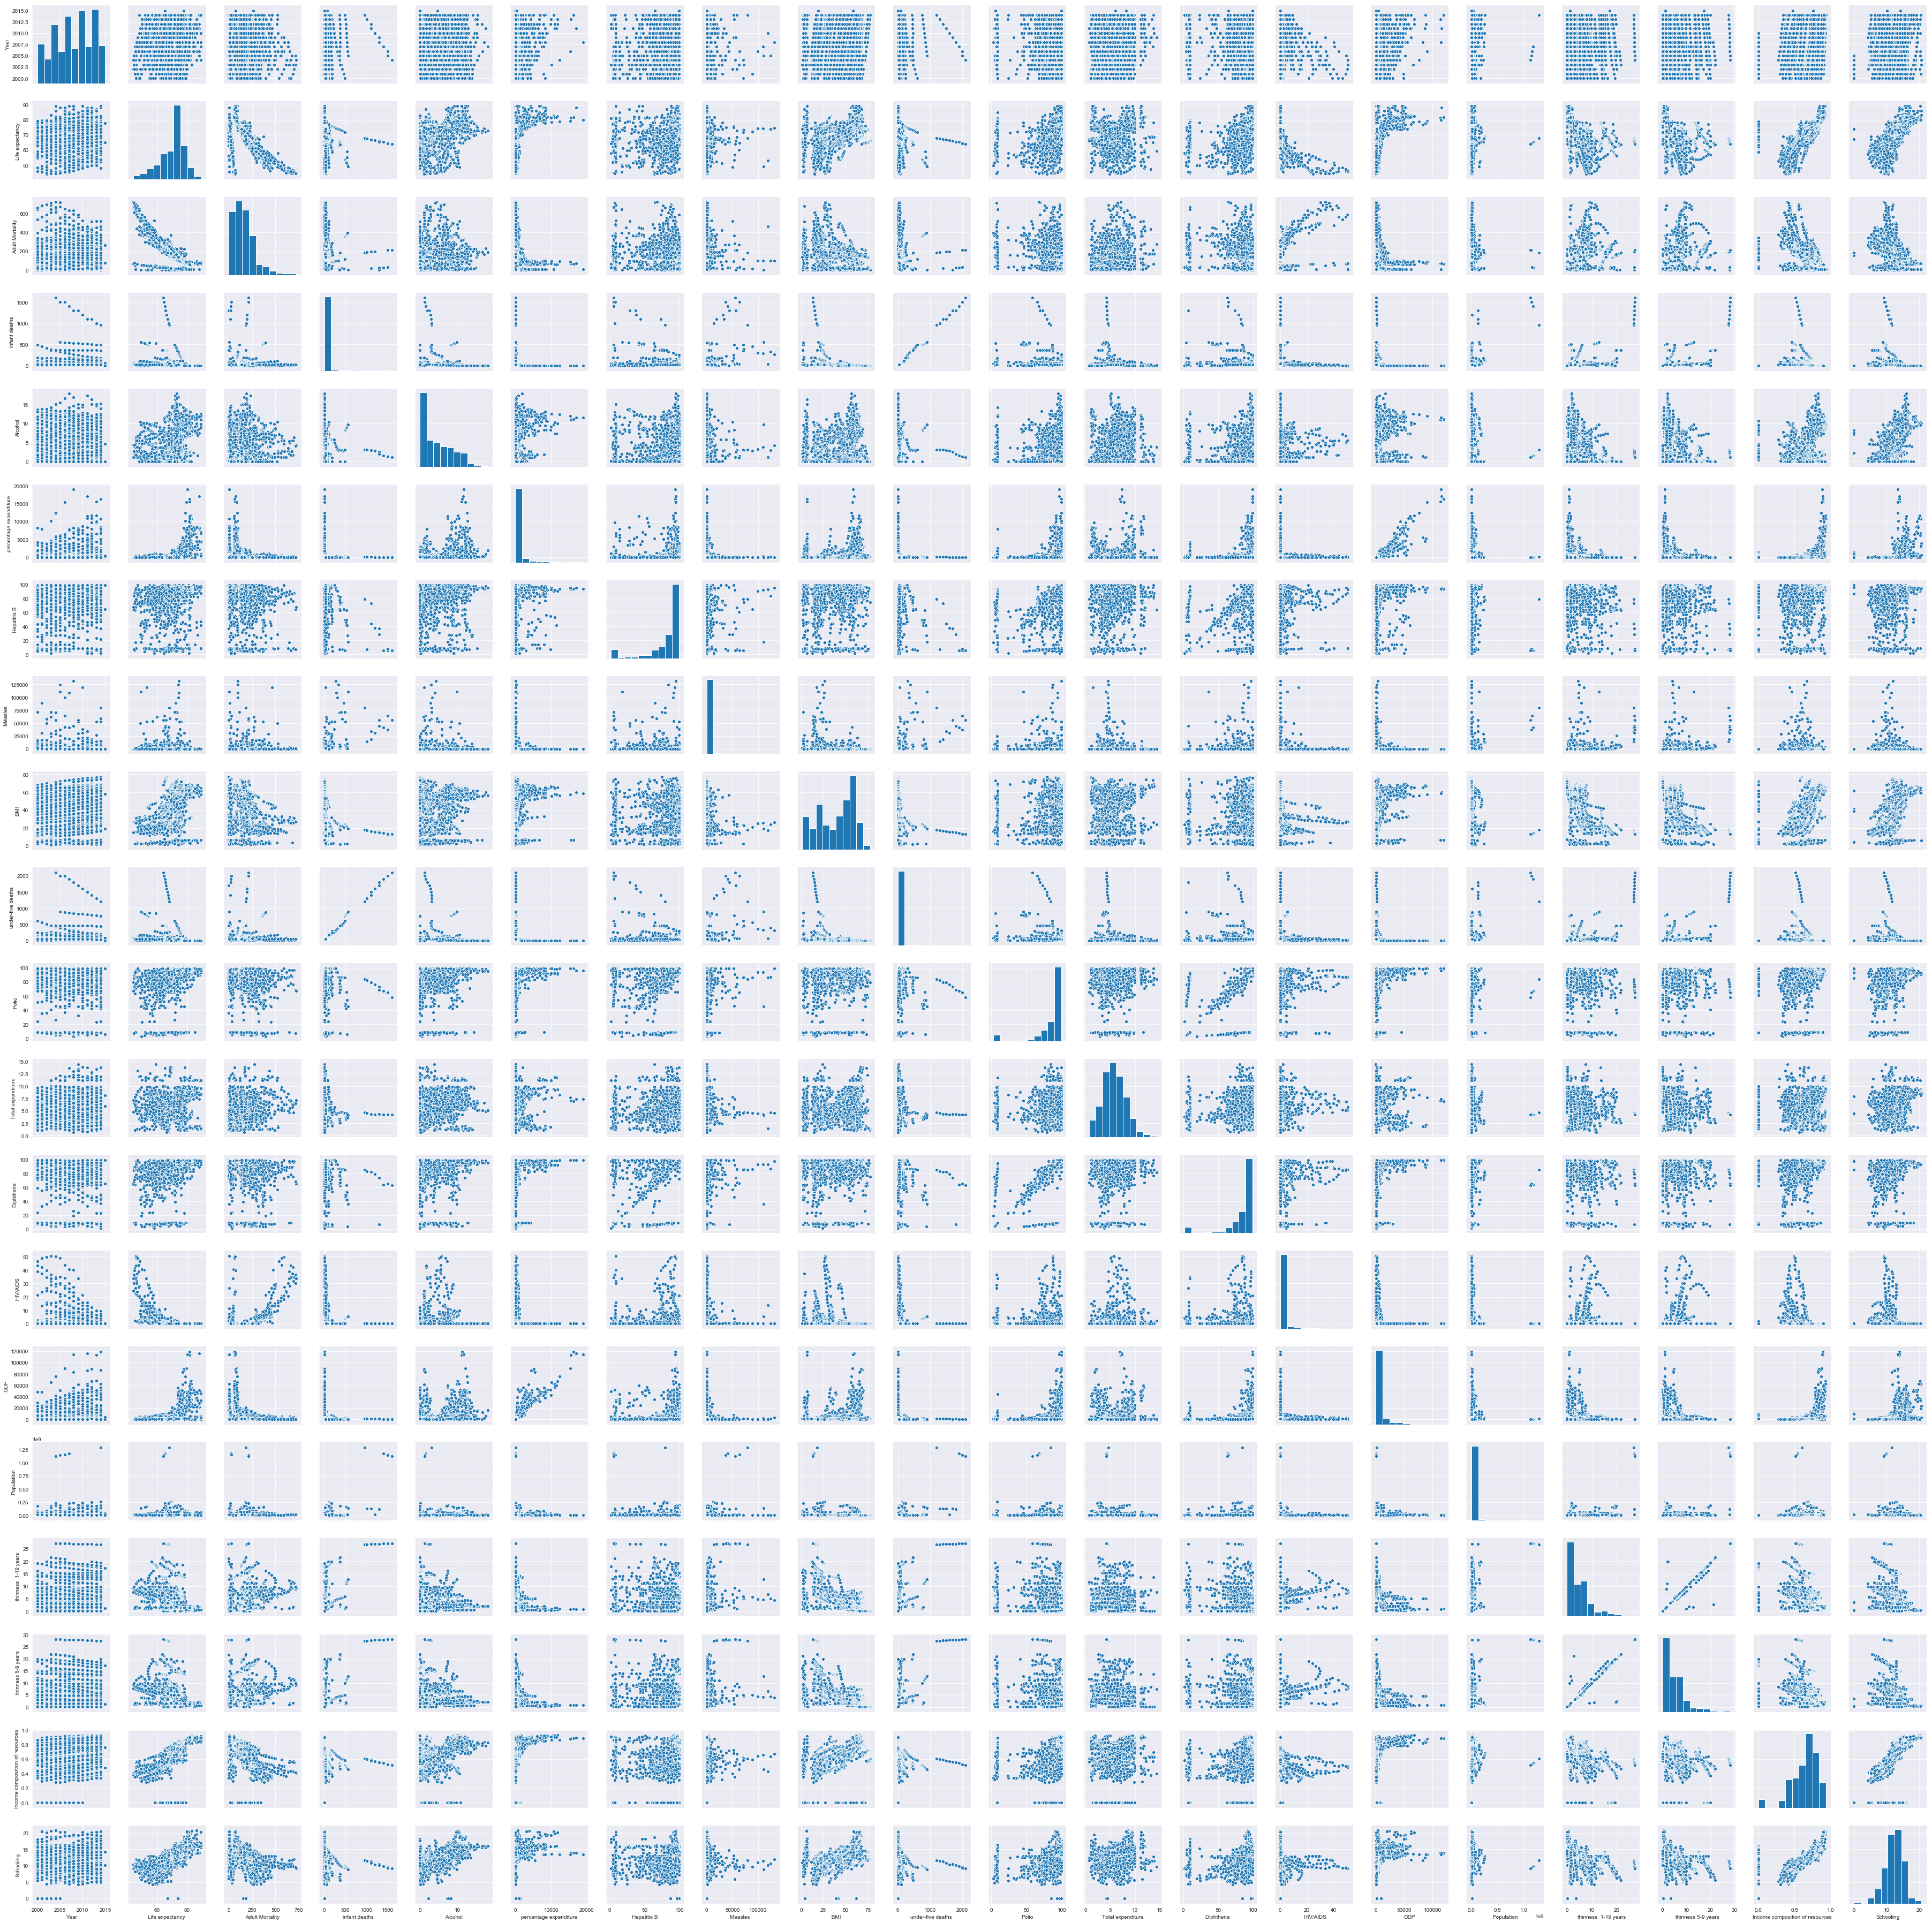

In [19]:
sns.pairplot(dataset)

# Comparative Analysis

#### We do a comparative analysis between two algorithms to find the best one in predicting the dataset.  We will compare the Random Forrest Regressor with simple Linear Regression

In [20]:
#create a copy of the original dataset to use for the 2 algorithms
data = dataset.copy()

#drop the year, country and status columns
data.drop(["Year","Country","Status"], axis=1, inplace=True)

data.head()

Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              65.0            263.0             62     0.01   
1              59.9            271.0             64     0.01   
2              59.9            268.0             66     0.01   
3              59.5            272.0             69     0.01   
4              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

#### create a dataframe and divide it into features and response targets

In [21]:
data = data.copy()

#get features
X = data.iloc[:,1:].values
print(X.shape)

#get the targets
Y = data.iloc[:,0].values
print(Y.shape)

(2083, 18)
(2083,)


#### Make a 70/20/10 training/validation/test split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=33)
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.1, random_state=33)

## Random Forrest Regressor 

##### A random forrest regressor is a type of bootstrapping model that  ensembles  decision trees  and runs them in parallel, it then outputs the mode or mean of the decision trees depending on whether or not we are running a classification or regression data.

##### fit the random forrest regressor model

In [23]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
base_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
def evaluate(model, features, outputs):
    predictions = model.predict(features)
    errors = np.sqrt(mean_squared_error(outputs, predictions))
    score = 100 * model.score(features, outputs)
    print('Model Performance')
    print('Root Mean Square Error: {:0.4f} '.format(errors))
    print('Score = {:0.2f}%.'.format(score))

###### Evaluate the mean squared error and the accuracy of the random forrest regresssor on the training data

In [25]:
RFR_accuracy = evaluate(base_model, X_val, Y_val)

Model Performance
Root Mean Square Error: 1.8139 
Score = 95.02%.


#### Fit the linear regression model to the training data

In [26]:
LR = LinearRegression()
LR_model = LR.fit(X_train, Y_train)

###### Evaluate the mean squared error and the accuracy of the random forrest regresssor on the training data

In [27]:
LR_accuracy = evaluate(LR_model, X_val, Y_val)

Model Performance
Root Mean Square Error: 3.5911 
Score = 80.49%.


From these initial results on the same training sets we can see that the random forrest regressor makes better predictions using the default number of trees (100). The mean squared error of the RFR and LR are 1.85 and 3.59 respectively which shows that RFR is better at predictions that the linear regression model

### Let's try to improve the Linear Regression model 

#### We standardize and scale our training data in an attempt to improve the accuracy of predictions

In [28]:
std_x_train = X_train
std_y_train = Y_train

# from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(std_x_train)
std_x_train = std_scale.transform(std_x_train)


#### Create a model with the standardized data

In [29]:
#create a model with the standardized data
std_LR = LinearRegression()
std_model = std_LR.fit(std_x_train, std_y_train)

#### Evaluate the accuracy of predictions on the standardized data

In [30]:
LR_accuracy = evaluate(std_model, std_x_train, std_y_train)

Model Performance
Root Mean Square Error: 3.6012 
Score = 81.47%.


#### We implement the same technique using MinMaxScaler from SKlearn

In [31]:
norm_x_train = X_train
norm_y_train = Y_train

# from sklearn.preprocessing import MinMaxScaler
norm_scale = MinMaxScaler().fit(norm_x_train)
norm_x_train = norm_scale.transform(norm_x_train)


#### Create a model with the normalized data

In [32]:
norm_LR = LinearRegression()
norm_model = norm_LR.fit(norm_x_train, norm_y_train)

#### Evaluate the accuracy of predictions on the normalized data

In [33]:
LR_accuracy = evaluate(norm_model, norm_x_train, norm_y_train)

Model Performance
Root Mean Square Error: 3.6012 
Score = 81.47%.


Let's see how the compare to one another graphically

In [34]:
###for the initial LR model

#Make predictions using the training data
predictions = std_model.predict(X_train)

#computer the Root Mean Square Error
rmse = np.sqrt(mean_squared_error(Y_train, predictions))

#Compute the models accuracy on the training data
score = LR_model.score(X_train, Y_train)

In [35]:
###for the standardized model
#Make predictions using the training data
std_predictions = std_model.predict(std_x_train)

#computer the Root Mean Square Error
std_rmse = np.sqrt(mean_squared_error(std_y_train, std_predictions))

#Compute the models accuracy on the training data
std_score = LR_model.score(X_train, Y_train) 

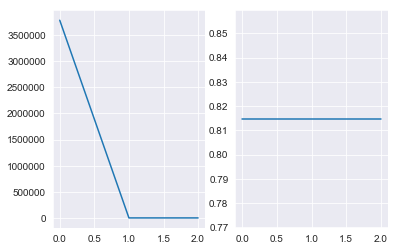

In [36]:
###for the normalized model

norm_predictions = norm_model.predict(norm_x_train)

#computer the Root Mean Square Error
norm_rmse = np.sqrt(mean_squared_error(norm_y_train, norm_predictions))

#Compute the models accuracy on the training data
norm_score = LR_model.score(X_train, Y_train) 


RMSEs = [rmse, std_rmse, norm_rmse]
x = [0, 1, 2]
plt.subplot(1,2,1)
plt.plot(x,RMSEs)

SCOREs = [score, std_score, norm_score]
x = [0, 1, 2]
plt.subplot(1,2,2)
plt.plot(x,SCOREs)

plt.show()

As the plot shows both standardization and normalization do not have any noticable effects, therefore the original data we be used in the final model as well

### Regularization
We compute the error and score on the validation dataset to see is there is an overfit


The validation score might be lower than the training score due to a slight overfit. We test the effect of regularization 

In [37]:
scores = []
rmses = []
reg_vals = [1e-5, 1e-4,1e-3,1e-2,1e-1,1]

for reg_val in reg_vals:
    reg_lr = Ridge(alpha=reg_val)
    reg_model = reg_lr.fit(X_train, Y_train)
    #Make predictions using the validation data
    reg_predictions = reg_model.predict(X_val)
    #compute the Root Mean Square Error
    rmses.append(np.sqrt(mean_squared_error(Y_val, reg_predictions)))

    #Compute the model's accuracy on the validation data
    scores.append(reg_model.score(X_val, Y_val)) 

print(rmses)
print(scores)

[3.591084652102141, 3.5910845344454794, 3.5910833583996404, 3.5910716499604005, 3.5909597106036877, 3.5903024876576515]
[0.8048580253868735, 0.8048580381739587, 0.80485816598819, 0.8048594384747095, 0.8048716039621185, 0.8049430228217167]


C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.059781e-18
  overwrite_a=True).T
C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.059797e-18
  overwrite_a=True).T
C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.059961e-18
  overwrite_a=True).T
C:\Users\Sizwe\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.061595e-18
  overwrite_a=True).T
C:\Users

Let's see, in a plot, how the regularization term affects the validation error and score

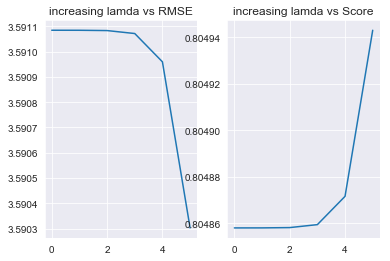

In [38]:
x = np.arange(0, len(reg_vals))
plt.subplot(1,2,1)
plt.title("increasing lamda vs RMSE")
plt.plot(x,rmses)

x = np.arange(0, len(reg_vals))
plt.subplot(1,2,2)
plt.title("increasing lamda vs Score")
plt.plot(x,scores)

plt.show()

While the plots show that a regularization of 1 has the bettter score, there are still very small, at an order of $10^{-2}$

## Final Results

#### We test our algorithms on the test data to see the accuracy of prediction

##### for the Random Forrest Regressor Model

In [39]:
RFR_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Root Mean Square Error: 1.9282 
Score = 94.84%.


##### for the Linear Regression model

In [40]:
#Make predictions using the validation data

LR_accuracy = evaluate(reg_model, X_test, Y_test)

Model Performance
Root Mean Square Error: 3.3619 
Score = 84.32%.


#### We can cleary see that even after regularization of the Linear Regression Model, the prediction accuracy of the Random Forrest Regressor is much better and the accuracy increases for both the models but with a 94% prediction accuracy, the RFR still does better than the regularized LR model